<a href="https://colab.research.google.com/github/iqbaladji27/Belajar-Git-Sija1/blob/main/case3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_excel('sales_data.xlsx')

In [ ]:
#Melihat data awal
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order_ID     5000 non-null   object        
 1   Customer_ID  5000 non-null   object        
 2   Order_Date   5000 non-null   datetime64[ns]
 3   Product      5000 non-null   object        
 4   Category     5000 non-null   object        
 5   Quantity     4900 non-null   float64       
 6   Price        4900 non-null   object        
 7   Total_Sales  4803 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 312.6+ KB


,Order_Date,Quantity,Total_Sales
count,5000,4900.000000,4.803000e+03
mean,2025-01-02 23:39:50.400000,4.970816,4.369731e+13
min,2025-01-01 00:00:00,1.000000,5.210000e+00
25%,2025-01-02 00:00:00,3.000000,1.560300e+02
50%,2025-01-03 00:00:00,5.000000,4.501000e+02
75%,2025-01-04 00:00:00,7.000000,1.177785e+03
max,2025-01-05 00:00:00,9.000000,5.143520e+16
std,NaN,2.609388,1.163169e+15


In [ ]:
#Total penjualan selama setahun terakhir
total_sales = data['Total_Sales'].sum()
print(f"Total penjualan: {total_sales}")

Total penjualan: 2.098782000049032e+17


In [ ]:
#Rata-rata nilai transaksi per pelanggan
avg_transaction = data.groupby('Customer_ID')['Total_Sales'].mean().mean()
print(f"Rata-rata nilai transaksi per pelanggan: {avg_transaction}")

Rata-rata nilai transaksi per pelanggan: 43697314179659.21


In [ ]:
#Jumlah transaksi perkategori
category_transactions = data['Category'].value_counts()
print(category_transactions)

Category
Home Appliances    1032
Books              1001
Toys                998
Clothing            992
Electronics         977
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


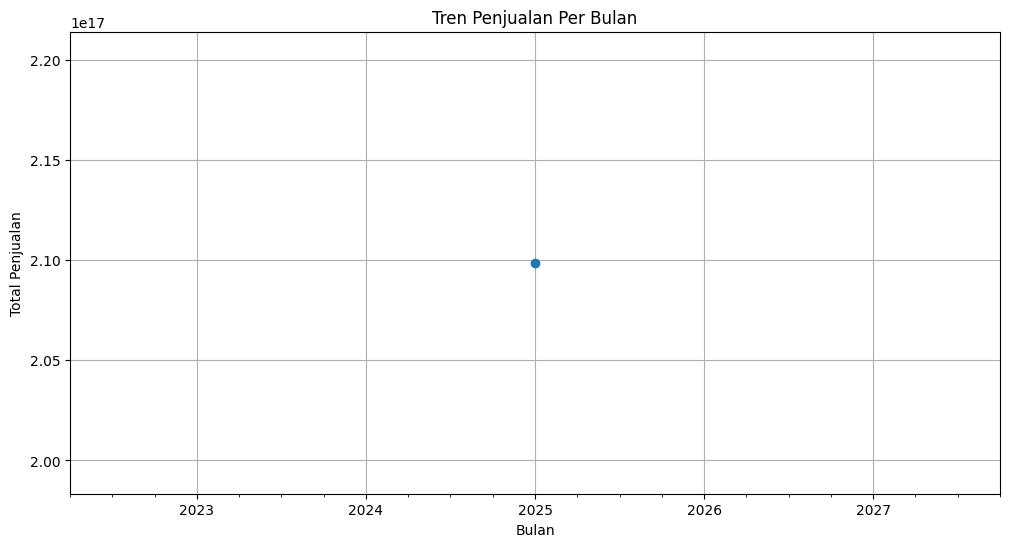

In [ ]:
#Visualisasi tren penjualan perbulan
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', title='Tren Penjualan Per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.grid(True)
plt.show()

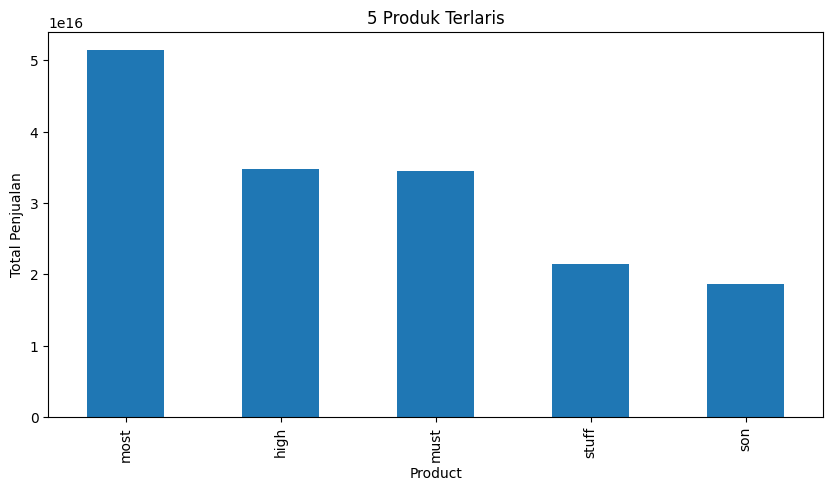

In [ ]:
#Visualisasi penjualan 5 produk terlaris
top_products = data.groupby('Product')['Total_Sales'].sum().nlargest(5)
top_products.plot(kind='bar', figsize=(10, 5), title='5 Produk Terlaris')
plt.ylabel('Total Penjualan')
plt.show()

In [ ]:
#Kategori produk dengan penjualan tertinggi dan terendah
category_sales = data.groupby('Category')['Total_Sales'].sum()
print(f"Kategori tertinggi: {category_sales.idxmax()} dengan penjualan {category_sales.max()}")
print(f"Kategori terendah: {category_sales.idxmin()} dengan penjualan {category_sales.min()}")

Kategori tertinggi: Toys dengan penjualan 9.209090000037506e+16
Kategori terendah: Home Appliances dengan penjualan 1343912.77


In [ ]:
#Rata-rata jumlah produk yang dibeli perkategori
avg_quantity = data.groupby('Category')['Quantity'].mean()
print(avg_quantity)

Category
Books              4.974542
Clothing           5.073770
Electronics        5.137461
Home Appliances    4.924975
Toys               4.748975
Name: Quantity, dtype: float64


In [ ]:
# Membagi dataset menjadi data latih (80%) dan data uji (20%)
X = data[['Category', 'Quantity', 'Price']]
y = data['Total_Sales']
# Menggunakan one-hot encoding untuk kategori
X = pd.get_dummies(X, columns=['Category'], drop_first=True)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

NameError: name 'data' is not defined